In [18]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch,FontManager
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import matplotlib.patches as pat
pd.set_option('display.max_columns',113)
pd.set_option('display.max_rows',113)

In [5]:
sb.competitions().query('season_name=="2024"')

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
21,223,282,South America,Copa America,male,False,True,2024,2024-07-15T18:00:33.653673,None,None,2024-07-15T18:00:33.653673
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500


Text(0.5, 0.01, 'Sonar length corresponds to average pass length\nSonar color corresponds to pass frequency (dark = more)')

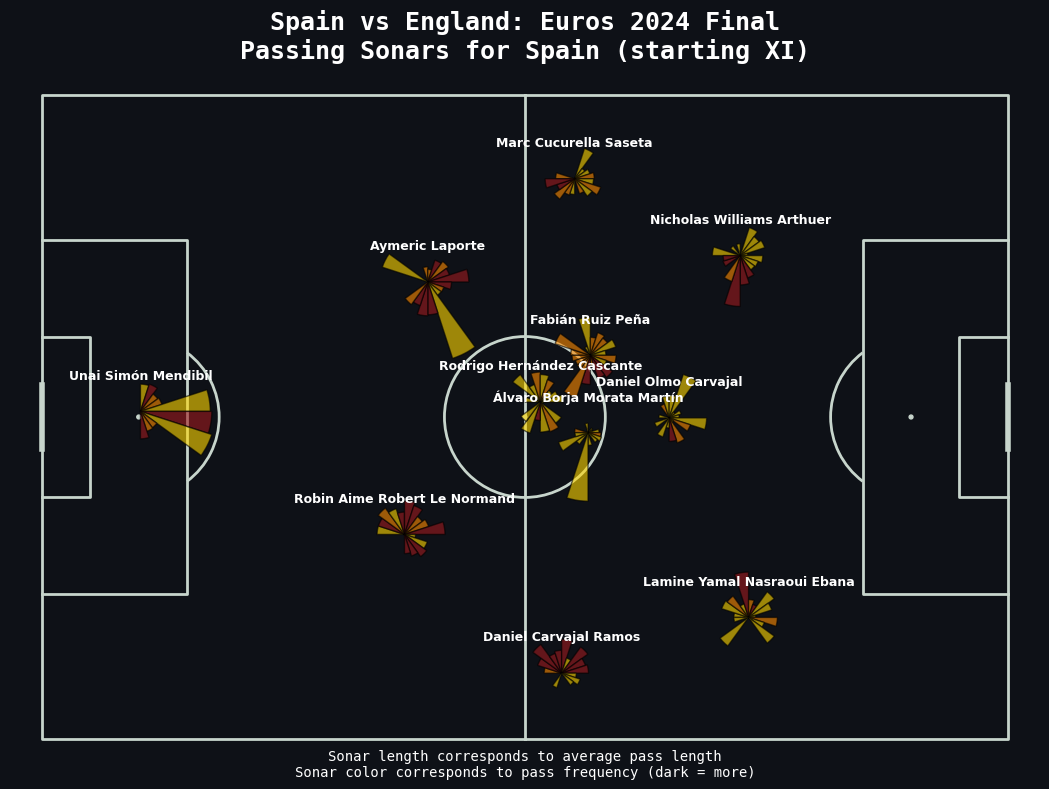

In [21]:
fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#0e1117')
ax.patch.set_facecolor('#0e1117')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='#c7d5cc')
pitch.draw(ax=ax)

for player in startingXI:
        for _, row in sonar_df[sonar_df.player == player].iterrows():
                degree_left_start = 198
                
                color = "gold" if row.amount < 3 else "darkorange" if row.amount < 5 else '#9f1b1e'

                n_bins = 20
                degree_left = degree_left_start +(360 / n_bins) * (row.angle_bin)
                degree_right = degree_left - (360 / n_bins)
                
                pass_wedge = pat.Wedge(
                        center=(row.x, row.y),
                        r=row.length*0.16, # scaling the sonar segments
                        theta1=degree_right,
                        theta2=degree_left,
                        facecolor=color,
                        edgecolor="black",
                        alpha=0.6
                )
                ax.add_patch(pass_wedge)

for _, row in average_location.iterrows():
        if row.name in startingXI:
            #annotation_text = barcelona_dict[row.name]

            pitch.annotate(
                row.name,
                xy=(row.x, row.y-4.5),
                c='white',
                va='center',
                ha='center',
                size=9,
                fontweight='bold',
                ax=ax
            )

ax.set_title(
  f"Spain vs England: Euros 2024 Final\nPassing Sonars for Spain (starting XI)",
  fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8
)

pitch.annotate(
  text='Sonar length corresponds to average pass length\nSonar color corresponds to pass frequency (dark = more)',
  xy=(0.5, 0.01), xycoords='axes fraction', fontsize=10, color='white', ha='center', va='center', fontfamily="Monospace", ax=ax
)

In [62]:
from statsbombpy import sb
import pandas as pd
import numpy as np
from mplsoccer import Pitch,VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.patches as pat


def passing_sonar(MATCH_ID, TEAM):
    passes = sb.events(match_id=MATCH_ID, split=True, flatten_attrs=False)["passes"]
    passes = passes[passes['team']==TEAM]
    df = passes[['pass', 'player']]

    df['angle'] = [df['pass'][i]['angle'] for i in df.index]
    df['length'] = [df['pass'][i]['length'] for i in df.index]
    df['angle_bin'] = pd.cut(
                        df['angle'],
                        bins=np.linspace(-np.pi,np.pi,21),
                        labels=False,
                        include_lowest=True
                    )

    sonar_df = df.groupby(["player", "angle_bin"], as_index=False)
    sonar_df = sonar_df.agg({"length": "mean"})
    pass_amt  = df.groupby(['player', 'angle_bin']).size().to_frame(name = 'amount').reset_index()
    sonar_df = pd.concat([sonar_df, pass_amt["amount"]], axis=1)

    passes["x"], passes["y"] = zip(*passes["location"])
    average_location = passes.groupby('player').agg({'x': ['mean'], 'y': ['mean']})
    average_location.columns = ['x', 'y']
    sonar_df = sonar_df.merge(average_location, left_on="player", right_index=True)

    lineups = sb.lineups(match_id=MATCH_ID)[TEAM]
    lineups['starter'] = [
                lineups['positions'][i][0]['start_reason']=='Starting XI'
                if lineups['positions'][i]!=[]
                else None
                for i in range(len(lineups))
                ]
    lineups = lineups[lineups["starter"]==True]
    startingXI =lineups['player_name'].to_list()
    sonar_df = sonar_df[sonar_df['player'].isin(startingXI)]

    fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
    fig.set_facecolor('#0e1117')
    ax.patch.set_facecolor('#0e1117')
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='#c7d5cc')
    pitch.draw(ax=ax)

    for player in startingXI:
        for _, row in sonar_df[sonar_df.player == player].iterrows():
                degree_left_start = 198

                color = "#8DBAEC" if row.amount < 3 else "#427CBE" if row.amount < 5 else '#1D497B'

                n_bins = 20
                degree_left = degree_left_start +(360 / n_bins) * (row.angle_bin)
                degree_right = degree_left - (360 / n_bins)
                
                pass_wedge = pat.Wedge(
                        center=(row.x, row.y),
                        r=row.length*0.16,
                        theta1=degree_right,
                        theta2=degree_left,
                        facecolor=color,
                        edgecolor="black",
                        alpha=0.6
                )
                ax.add_patch(pass_wedge)

    spain_dict = {
         'Aymeric Laporte': 'Laporte',
         'Daniel Carvajal Ramos': 'Carvajal',
         'Daniel Olmo Carvajal': 'Olmo',
         'Fabián Ruiz Peña': 'Fabián Ruiz',
         'Lamine Yamal Nasraoui Ebana': 'Lamine Yamal',
         "Marc Cucurella Saseta": "Marc Cucurella",
         'Nicholas Williams Arthuer': 'Nico Williams',
         'Robin Aime Robert Le Normand': 'Le Normand',
         'Rodrigo Hernández Cascante': 'Rodri',
         'Unai Simón Mendibil': 'Unai Simón',
         'Álvaro Borja Morata Martín': 'Morata',
        }
    for _, row in average_location.iterrows():
        if row.name in startingXI:
            #annotation_text = spain_dict[row.name]
            annotation_text = row.name

            pitch.annotate(
                annotation_text,
                xy=(row.x, row.y-4.5),
                c='white',
                va='center',
                ha='center',
                size=9,
                fontweight='bold',
                ax=ax
            )

    ax.set_title(
      f"{TEAM} vs Spain: Euros 2024 Final\nPassing Sonars for {TEAM} (starting XI)",
      fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8
    )
    pitch.annotate(
      text='Sonar length corresponds to average pass length\nSonar color corresponds to pass frequency (dark = more)',
      xy=(0.5, 0.01), xycoords='axes fraction', fontsize=10, color='white', ha='center', va='center', fontfamily="Monospace", ax=ax
    )
        
    return fig

C:\Users\acer\AppData\Local\Temp\ipykernel_7464\1044602078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['angle'] = [df['pass'][i]['angle'] for i in df.index]
C:\Users\acer\AppData\Local\Temp\ipykernel_7464\1044602078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = [df['pass'][i]['length'] for i in df.index]
C:\Users\acer\AppData\Local\Temp\ipykernel_7464\1044602078.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

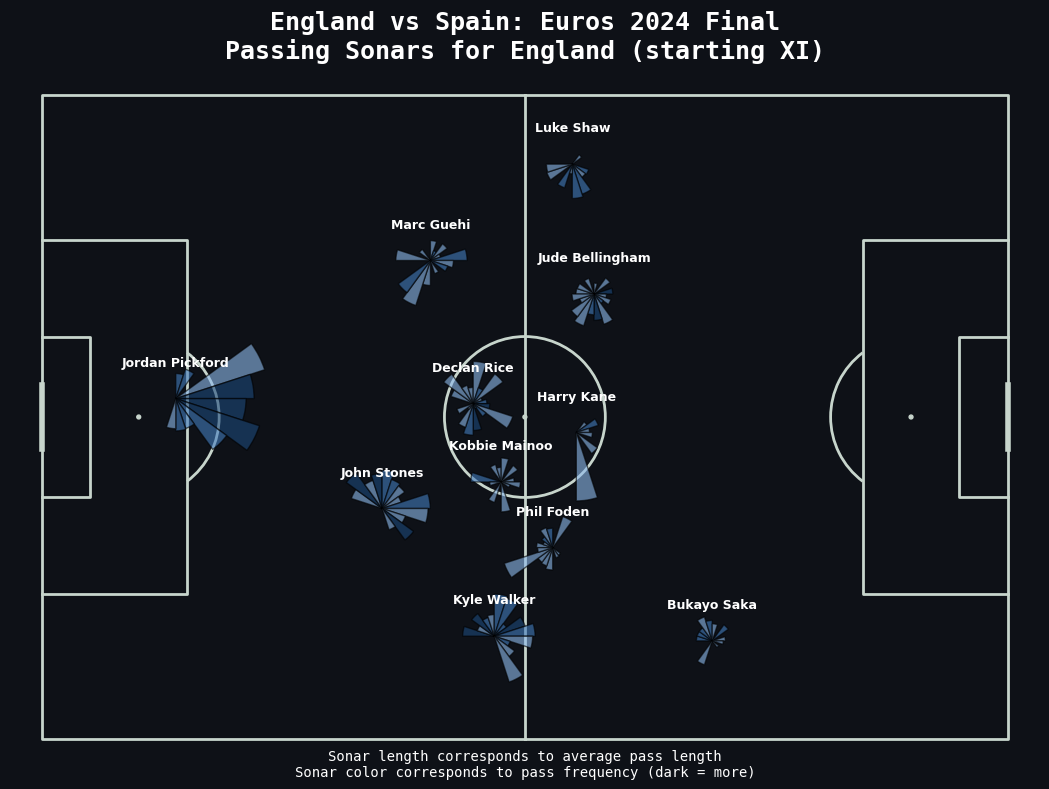

In [63]:
fig = passing_sonar(3943043, 'England')